In [2]:
import math
import numpy as np
import pandas as pd
import pmdarima as pm
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
%run 'functions.py'

In [104]:
a1 = pd.read_csv('~/Downloads/a1.csv', index_col=0)
a2 = pd.read_csv('~/Downloads/a2.csv', index_col=0)

In [114]:
control_houses = set(a1.index).intersection(set(a2.index))

a1 = a1.loc[a1.index.isin(control_houses), a1.columns]
a2 = a2.loc[a2.index.isin(control_houses), a2.columns]

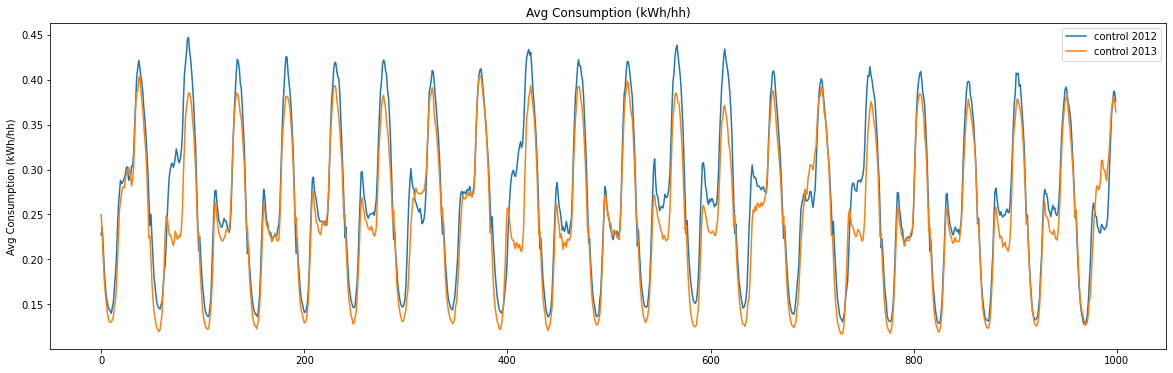

In [132]:
plt.figure(figsize=(20, 6))
n=1000
plt.plot(a1.mean().values[:n], label='control 2012')
plt.plot(a2.mean().values[:n], label='control 2013')
plt.ylabel('Avg Consumption (kWh/hh)')
plt.title('Avg Consumption (kWh/hh)')
plt.legend()
plt.show()

In [14]:
mean_per_hh_2012_af = pd.read_csv('~/Downloads/mean_per_hh_2012_af.csv', header=0)
mean_per_hh_2013_af = pd.read_csv('~/Downloads/mean_per_hh_2013_af.csv', header=0)

In [17]:
temp = pd.read_csv('../data/hourly.csv', usecols=['YEAR', 'MO', 'DY', 'HR', 'T2M'])
temp.columns = ['year', 'month', 'day', 'hour', 'temp']
temp['DT'] = pd.to_datetime(temp[['year', 'month', 'day', 'hour']])
temp.set_index('DT', inplace=True)

# remove feb 29, 2012
temp = temp.loc[(temp.index != '2012-02-29')]

temp_2013 = temp.loc[(temp['year'] == 2013)]
temp_2012 = temp.loc[(temp['year'] == 2012)]

In [20]:
temp_2012[temp_2012['month'] == 12]

,year,month,day,hour,temp
DT,,,,,
2012-12-01 00:00:00,2012,12,1,0,-1.73
2012-12-01 01:00:00,2012,12,1,1,-1.74
2012-12-01 02:00:00,2012,12,1,2,-1.88
2012-12-01 03:00:00,2012,12,1,3,-2.04
2012-12-01 04:00:00,2012,12,1,4,-2.34
...,...,...,...,...,...
2012-12-31 19:00:00,2012,12,31,19,8.82
2012-12-31 20:00:00,2012,12,31,20,8.40
2012-12-31 21:00:00,2012,12,31,21,8.30


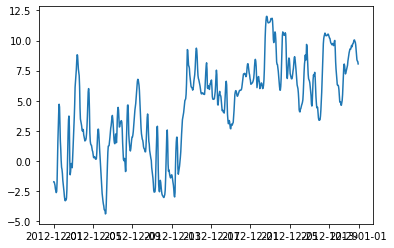

In [25]:
plt.plot(_20['temp']);

In [27]:
def x(consumption_df):
    consumption_df['year'] = consumption_df['date_time'].dt.year
    consumption_df['month'] = consumption_df['date_time'].dt.month
    consumption_df['day'] = consumption_df['date_time'].dt.day
    consumption_df['hour'] = consumption_df['date_time'].dt.hour

    consumption_df['DT'] = pd.to_datetime(consumption_df[['year', 'month', 'day', 'hour']])

    return consumption_df

In [64]:
affluent_dec_2013 = affluent_dec_2013.groupby(affluent_dec_2013['DT'])['KWH/hh'].sum().to_frame()

In [65]:
affluent_dec_2013

,KWH/hh
DT,
2013-12-01 00:00:00,0.589104
2013-12-01 01:00:00,0.467148
2013-12-01 02:00:00,0.388411
2013-12-01 03:00:00,0.344187
2013-12-01 04:00:00,0.318556
...,...
2013-12-31 19:00:00,0.877648
2013-12-31 20:00:00,0.818988
2013-12-31 21:00:00,0.729714


In [66]:
affluent_dec_2013.to_csv('~/Downloads/affluent_dec_2013.csv')

In [56]:
affluent_dec_2012[' = pd.DataFrame()']

In [37]:
# convert date_time from str to datetime
mean_per_hh_2013_af['date_time'] = mean_per_hh_2013_af['date_time'].astype('M8[ns]')

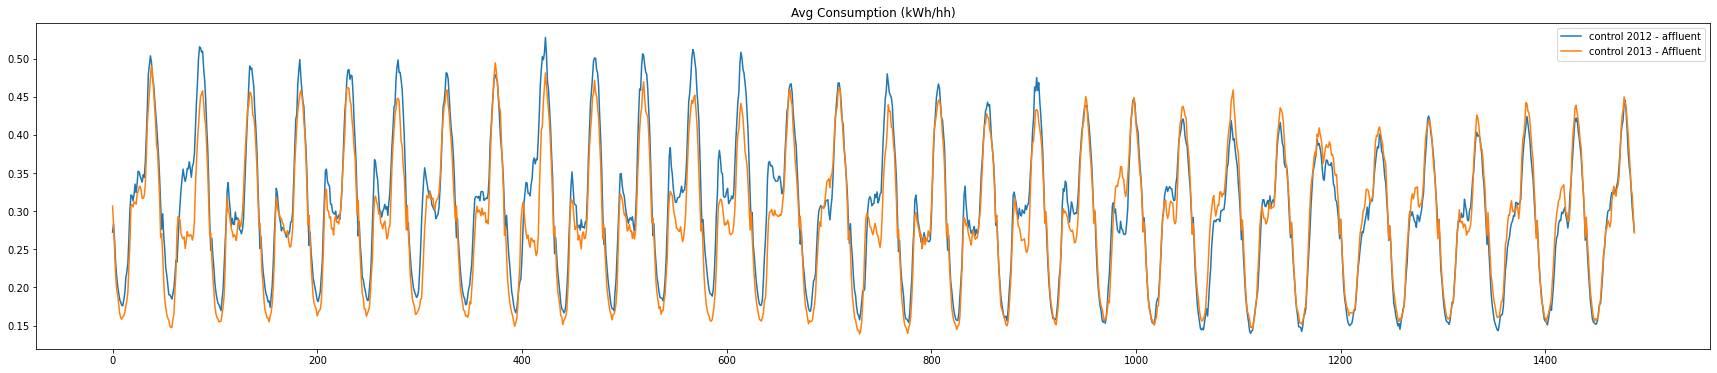

In [67]:
plt.figure(figsize=(30, 6))
n=len(mean_per_hh_2013_af)
plt.plot(mean_per_hh_2012_af[:n]['KWH/hh'], label='control 2012 - affluent')
plt.plot(mean_per_hh_2013_af[:n]['KWH/hh'], label='control 2013 - Affluent')
plt.title('Avg Consumption (kWh/hh)')
plt.legend()
plt.show()

In [4]:
total_usage_2012 = pd.read_parquet('../data/total_usage_2012.gzip')
total_usage_2013 = pd.read_parquet('../data/total_usage_2013.gzip')
total_usage_2014 = pd.read_parquet('../data/total_usage_2014.gzip')

In [5]:
total_usage_2012_sliced = total_usage_2012.loc[
    (total_usage_2012['date_time'].dt.normalize() <= '2012-02-27') 
    & (~total_usage_2012['treated'])].drop('treated', axis=1)

total_usage_2013_sliced = total_usage_2013.loc[
    (total_usage_2013['date_time'].dt.normalize() <= '2013-02-27') 
    & (~total_usage_2013['treated'])].drop('treated', axis=1)

total_usage_2014_sliced = total_usage_2014.loc[
    (total_usage_2014['date_time'].dt.normalize() <= '2014-02-27') 
    & (~total_usage_2014['treated'])].drop('treated', axis=1)

we have more houses present in the 2013 and 2014 data than in 2012, taking the mean over all houses may not be the best idea but okay for now. things to try is:
- another two month slice (there are more houses later in 2012)
- getting the intersection and looking at those house data only (this would reduce the number of houses by a lot)

In [5]:
unique_house_2012 = unique_house_per_hh(total_usage_2012_sliced)
unique_house_2013 = unique_house_per_hh(total_usage_2013_sliced)
unique_house_2014 = unique_house_per_hh(total_usage_2014_sliced)

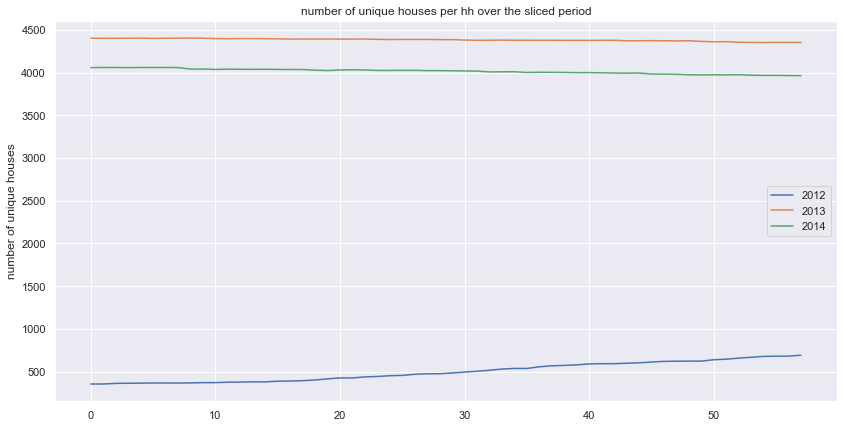

In [11]:
plt.plot(unique_house_2012.values, label='2012')
plt.plot(unique_house_2013.values, label='2013')
plt.plot(unique_house_2014.values, label='2014')
plt.ylabel('number of unique houses')
plt.title('number of unique houses per hh over the sliced period')
plt.legend()
plt.show()

now let's look at the number of hh values per day per house. there are days for which there are less than 48 hh data points -- those days are often days where the house got started. there are days with 49 values (jan and feb 15), those just have the midnight value repeated. for now taking the overall mean is probably fine.

In [59]:
count_hh_per_house_per_day_2012 = count_hh_per_house_per_day(total_usage_2012_sliced)

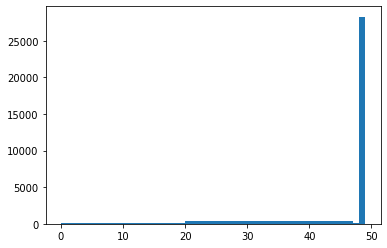

In [67]:
plt.hist(count_hh_per_house_per_day_2012, bins=[0, 20, 47, 48, 49]);

In [73]:
_49ers = count_hh_per_house_per_day_2012.loc[count_hh_per_house_per_day_2012.values == 49]
_48ers = count_hh_per_house_per_day_2012.loc[count_hh_per_house_per_day_2012.values == 48]
lessthan48ers = count_hh_per_house_per_day_2012.loc[count_hh_per_house_per_day_2012.values < 48]

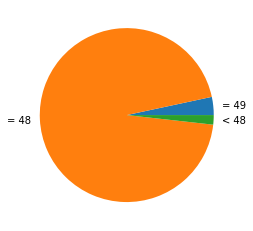

In [80]:
plt.pie([len(x) for x in [_49ers, _48ers, lessthan48ers]], labels=['= 49', '= 48', '< 48']);

In [6]:
mean_per_hh_2012 = total_usage_2012_sliced.groupby(total_usage_2012_sliced['date_time']).mean()
mean_per_hh_2013 = total_usage_2013_sliced.groupby(total_usage_2013_sliced['date_time']).mean()
mean_per_hh_2014 = total_usage_2014_sliced.groupby(total_usage_2014_sliced['date_time']).mean()

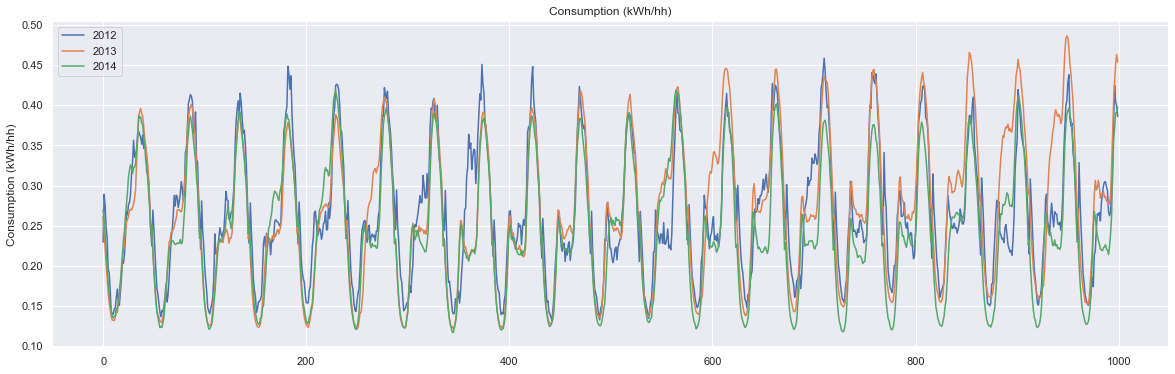

In [36]:
plt.figure(figsize=(20, 6))
n=1000
plt.plot(mean_per_hh_2012.values[:n], label='2012')
plt.plot(mean_per_hh_2013.values[:n], label='2013')
plt.plot(mean_per_hh_2014.values[:n], label='2014')
plt.ylabel('Consumption (kWh/hh)')
plt.title('Consumption (kWh/hh)')
plt.legend()
plt.show()

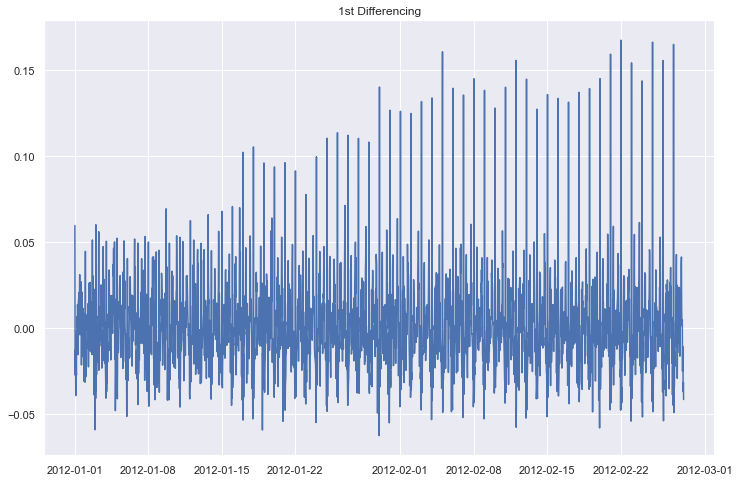

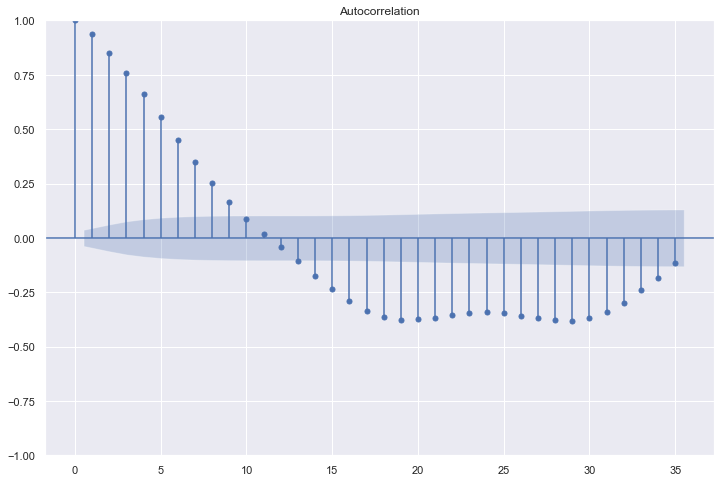

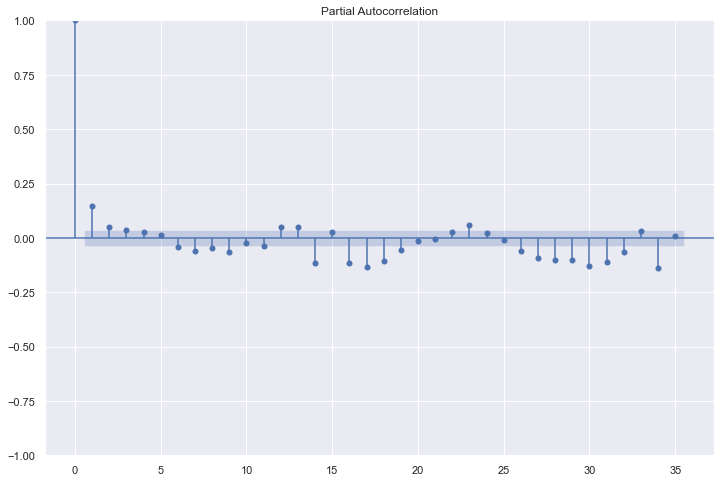

In [33]:
plt.plot(mean_per_hh_2012.diff())
plt.title('1st Differencing')

# d = 1, one set of differencing gives us (weak) stationarity
plot_acf(mean_per_hh_2012);

# p = 1 or 2 -- how many cross the PACF blue significant region
plot_pacf(mean_per_hh_2012.diff().dropna());

# q = 1 or 2 -- how many cross the ACF blue significant region

In [90]:
# (p, d, q=1 confused a lil but ACF, it's okay)
model = ARIMA(mean_per_hh_2012, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

/Users/sabanejad/Projects/demand-response/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30T will be used.
  warnings.warn('No frequency information was'
/Users/sabanejad/Projects/demand-response/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30T will be used.
  warnings.warn('No frequency information was'
/Users/sabanejad/Projects/demand-response/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 30T will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                 KWH/hh   No. Observations:                 2784
Model:                 ARIMA(1, 1, 1)   Log Likelihood                6121.627
Date:                Sat, 16 Apr 2022   AIC                         -12237.254
Time:                        13:21:04   BIC                         -12219.460
Sample:                    01-01-2012   HQIC                        -12230.829
                         - 02-27-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5287      0.084      6.264      0.000       0.363       0.694
ma.L1         -0.3922      0.084     -4.693      0.000      -0.556      -0.228
sigma2         0.0007   1.35e-05     53.226      0.0

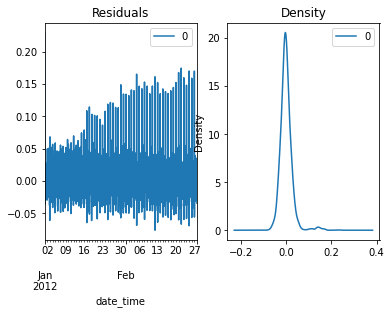

In [91]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [46]:
def func(x, a, b, c, d):
    return [a * math.sin(b*x_i*math.pi/24 + c) + a * math.sin(b*x_i*math.pi/12) + d for x_i in x]

In [88]:
ydata = mean_per_hh_2013['KWH/hh']
xdata = np.arange(0, len(ydata))
popt, _ = curve_fit(func, xdata, ydata, p0=(-0.08, 1, 0, 0.24))
print(popt)
yguess = func(xdata, *popt)
# yguess = func(xdata, )

[-0.07777196  1.00030318  0.00124122  0.26537991]


In [96]:
def print_error(df):
    ydata = df['KWH/hh']
    xdata = np.arange(0, len(ydata))
    return me(ydata, func(xdata, -0.07777196, 1.00030318, 0.00124122, 0.26537991))

In [97]:
print('2012:', print_error(mean_per_hh_2012))

2012: 0.013895584137165047


In [101]:
print('2013:', print_error(mean_per_hh_2013))

2013: 7.006898895711073e-10


In [100]:
print('2014:', print_error(mean_per_hh_2014))

2014: -0.02366035695520801


In [ ]:
day of the week, avg temp, season -> inputs
coefficients to 2-3 sin waves per day -> outputs
period doesn't change but the magnitude does change

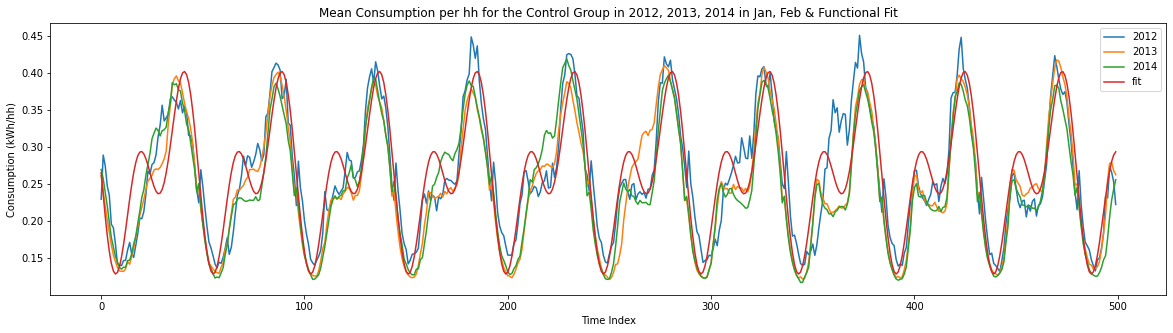

In [103]:
n=500
plt.subplots(figsize=(20, 5))
plt.plot(mean_per_hh_2012['KWH/hh'].values[:n], label='2012')
plt.plot(mean_per_hh_2013['KWH/hh'].values[:n], label='2013')
plt.plot(mean_per_hh_2014['KWH/hh'].values[:n], label='2014')
plt.plot(yguess[:n], label='fit')
plt.legend()
plt.title('Mean Consumption per hh for the Control Group in 2012, 2013, 2014 in Jan, Feb & Functional Fit')
plt.xlabel('Time Index')
plt.ylabel('Consumption (kWh/hh)')
plt.show()

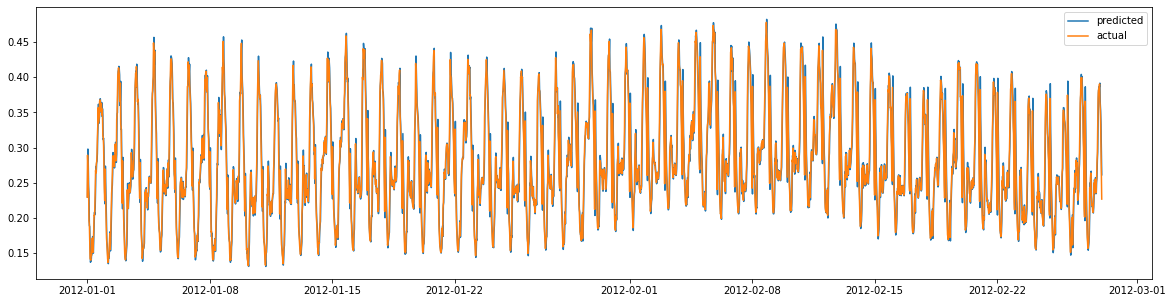

In [107]:
plt.subplots(figsize=(20, 5))
plt.plot(model_fit.predict()[1:], label='predicted')
plt.plot(mean_per_hh_2012, label='actual')
plt.legend()
plt.show()

/Users/sabanejad/Projects/demand-response/venv/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

/Users/sabanejad/Projects/demand-response/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred freque

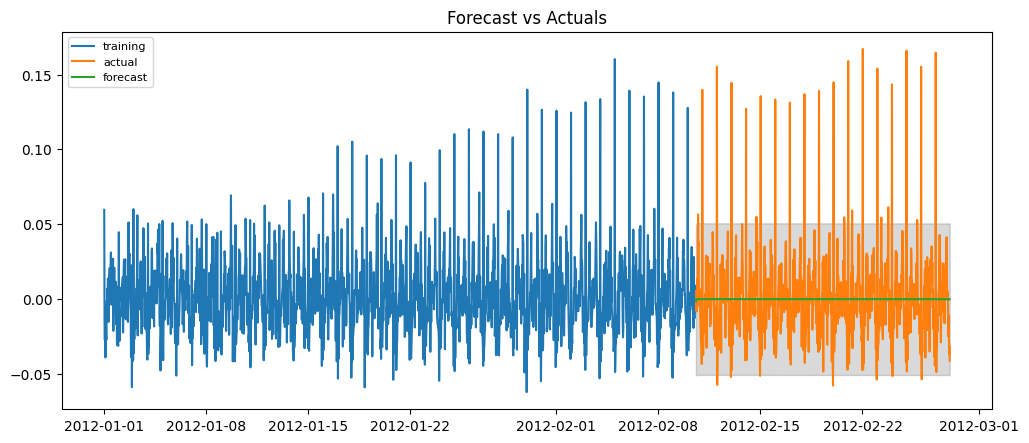

In [131]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train.diff().dropna(), order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(836, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train.diff().dropna(), label='training')
plt.plot(test.diff().dropna(), label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [8]:
n =int(0.7*len(mean_per_hh_2012))
train = mean_per_hh_2012[:n]
test = mean_per_hh_2012[n:]

In [138]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return np.array(diff)

In [140]:
# seasonal difference
X = train.values
hh_in_day = 48
differenced = difference(X, hh_in_day)

In [141]:
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit()
# print summary of fit model
print(model_fit.summary())

/Users/sabanejad/Projects/demand-response/venv/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)



                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1900
Model:                     ARMA(7, 1)   Log Likelihood                5194.505
Method:                       css-mle   S.D. of innovations              0.016
Date:                Sat, 16 Apr 2022   AIC                         -10369.009
Time:                        14:50:48   BIC                         -10313.513
Sample:                             0   HQIC                        -10348.579
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0013      0.002      0.617      0.537      -0.003       0.005
ar.L1.y       -0.0839      0.082     -1.019      0.308      -0.245       0.077
ar.L2.y        0.7298      0.066     11.039      0.0

In [143]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [156]:
# one-step out-of sample forecast
forecast = model_fit.forecast()[0]
# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, days_in_year)
print('Forecast:', forecast, ', Actual:', test.values[0])

Forecast: [0.27678612] , Actual: [0.26880171]


In [157]:
# one-step out of sample forecast
start_index = len(differenced)
end_index = len(differenced)
forecast = model_fit.predict(start=start_index, end=end_index)
# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, days_in_year)
print('Forecast: %f' % forecast)

Forecast: 0.276786


In [ ]:
from datetime import datetime
start_index = datetime(2012, 2, 10, 14, 0, 0)
end_index = datetime(2012, 2, 10, 14, 0, 0)
# start_index = '2012-02-10 14:00:00'
# end_index = '2012-02-10 14:00:00'
forecast = model_fit.predict(start=start_index, end=end_index)

In [179]:
# multi-step out-of-sample forecast
start_index = len(differenced)
end_index = start_index + len(test)
forecast = model_fit.predict(start=start_index, end=end_index)
# invert the differenced forecast to something usable
# history = [x for x in X]
predicted=[]
delta=[]
for yhat in forecast:
	inverted = inverse_difference(history, yhat, days_in_year)
# 	print('Step %s: %f, Actual:%a' % (day, inverted, test.iloc[day][0]))
	delta.append(inverted-test.iloc[day][0])
	predicted.append(inverted)

In [181]:
plt.plot(predicted, label)

837
836


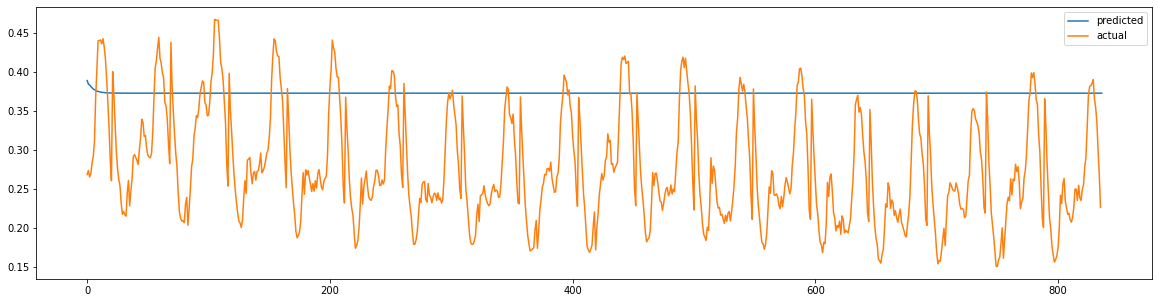

In [186]:
plt.subplots(figsize=(20, 5))
plt.plot(predicted, label='predicted')
plt.plot(test.values, label='actual')
plt.legend()
plt.show()

In [9]:
from scalecast.Forecaster import Forecaster

In [10]:
# TODO: get rid of rmse
f = Forecaster(y=train['KWH/hh'], current_dates=train.index)

In [11]:
f.set_test_length(30)

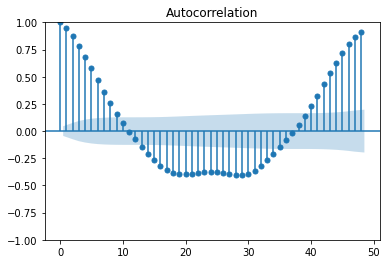

In [12]:
f.plot_acf(train_only=True,lags=48)
plt.show()

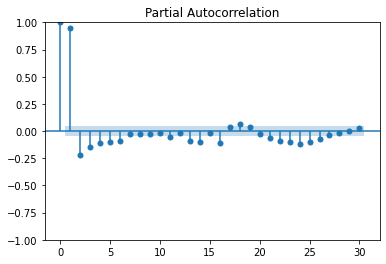

In [13]:
f.plot_pacf(train_only=True,lags=30)
plt.show()

In [14]:
isstationary = f.adf_test(quiet=False)

series appears to be stationary


In [18]:
f.generate_future_dates(100)

In [20]:
f.set_estimator('arima')
f.manual_forecast(order=(1,1,0),seasonal_order=(1,1,0,7))
f.save_summary_stats()

f.manual_forecast(order=(1,1,1),seasonal_order=(0,1,1,7),call_me='arima_ma_terms')
f.save_summary_stats()

ValueError: Found input variables with inconsistent numbers of samples: [0, 1948]

In [21]:
len(train)

1948

In [15]:
import pandas as pd
import numpy as np
from scalecast.Forecaster import Forecaster
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14,7)})

f = Forecaster(y=train['KWH/hh'], current_dates=train.index)

f.generate_future_dates(12) # 12-month forecast horizon
f.set_test_length(.2) # 20% test set
f.set_estimator('arima') # set arima
f.manual_forecast(call_me='arima1') # forecast with arima

f.plot_test_set(ci=True) # view test results
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

f.plot(ci=True) # view forecast results
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [0, 1948]

In [18]:
from scalecast import GridGenerator

models = ('mlr','knn','svr','xgboost','elasticnet','mlp','prophet')
GridGenerator.get_example_grids() # saves Grids.py with validation grids for each model that can be used to tune the forecasts
f = Forecaster(y=train['KWH/hh'], current_dates=train.index) # to initialize, specify y and current_dates (must be arrays of the same length)
f.set_test_length(12) # specify a test length for your models - do this before eda
f.generate_future_dates(24) # this will create future dates that are on the same interval as the current dates and it will also set the forecast length
f.add_ar_terms(4) # add AR terms before differencing
f.add_AR_terms((2,12)) # seasonal AR terms
f.integrate() # automatically decides if the y term and all ar terms should be differenced to make the series stationary
f.add_seasonal_regressors('month',raw=False,sincos=True) # uses pandas attributes: raw=True creates integers (default), sincos=True creates wave functions
f.add_seasonal_regressors('year')
f.add_covid19_regressor() # dates are flexible, default is from when disney world closed to when US CDC lifted mask recommendations
f.add_time_trend()
f.set_validation_length(6) # length, different than test_length, to tune the hyperparameters 
f.tune_test_forecast(models)
f.plot_test_set(models='top_3',order_by='LevelTestSetMAPE',ci=True) # plots the differenced test set with confidence intervals
plt.show()
f.plot(order_by='LevelTestSetMAPE',level=True) # plots the level forecast
plt.show()

ModuleNotFoundError: No module named 'fbprophet'

<AxesSubplot:xlabel='Date', ylabel='Values'>

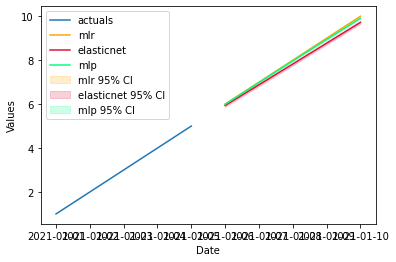

In [22]:
from scalecast.Forecaster import Forecaster
from scalecast import GridGenerator
models = ('mlr','elasticnet','mlp') # many others available
GridGenerator.get_example_grids() # writes the Grids.py file to your working directory
array_of_dates = ['2021-01-01','2021-01-02','2021-01-03','2021-01-04','2021-01-05']
array_of_values = [1,2,3,4,5]
f = Forecaster(y=array_of_values, current_dates=array_of_dates)
f.generate_future_dates(5) # forecast length of 5
f.add_ar_terms(1) # one lag
f.add_time_trend() # time trend
f.tune_test_forecast(models)
f.plot(ci=True) # see the results visually

In [30]:
from scalecast.Forecaster import Forecaster
from scalecast import GridGenerator
from scalecast.notebook import tune_test_forecast, results_vis
import pandas_datareader as pdr # !pip install pandas-datareader
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={"figure.figsize": (12, 8)})

f_dict = {}
models = ('mlr','elasticnet','mlp')
GridGenerator.get_example_grids() # writes the Grids.py file to your working directory

for sym in ('UNRATE','GDP'):
    df= pdr.get_data_fred(sym, start = '2000-01-01')
    f= Forecaster(y=df[sym],current_dates=df.index)
    f.generate_future_dates(12) # forecast 12 periods to the future
    f.set_test_length(12) # test models on 12 periods
    f.set_validation_length(4) # validate on the previous 4 periods
    f.add_time_trend()
    f.integrate() # take differences to make data stationary
#     f.add_ar_terms(2)
    f.add_seasonal_regressors('quarter',raw=False,dummy=True)
    tune_test_forecast(f,models) # adds a progress bar that is nice for notebooks
    f_dict[sym] = f

results_vis(f_dict) # toggle through results with jupyter widgets

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Dropdown(description='Time Series:', options=('UNRATE', 'GDP'), value='UNRATE')

Dropdown(description='No. Models', options=(1, 2, 3), value=1)

Dropdown(description='View Level', options=(True, False), value=True)

Dropdown(description='View Confidence Intervals', options=(True, False), value=True)

Dropdown(description='Order By', options=('InSampleMAE', 'InSampleMAPE', 'InSampleR2', 'InSampleRMSE', 'LevelT…

Button(description='Select Time Series', style=ButtonStyle())

Output()

In [32]:
f.add_seasonal_regressors('hour', 'week', 'month', raw=False, sincos=True)

In [75]:
daily_2012 = mean_per_hh_2012.reset_index()
daily_2012 = daily_2012.groupby(daily_2012['date_time'].dt.normalize()).sum()

In [86]:
daily_2013 = mean_per_hh_2013.reset_index()
daily_2013 = daily_2013.groupby(daily_2013['date_time'].dt.normalize()).sum()

In [87]:
daily_2014 = mean_per_hh_2014.reset_index()
daily_2014 = daily_2014.groupby(daily_2014['date_time'].dt.normalize()).sum()

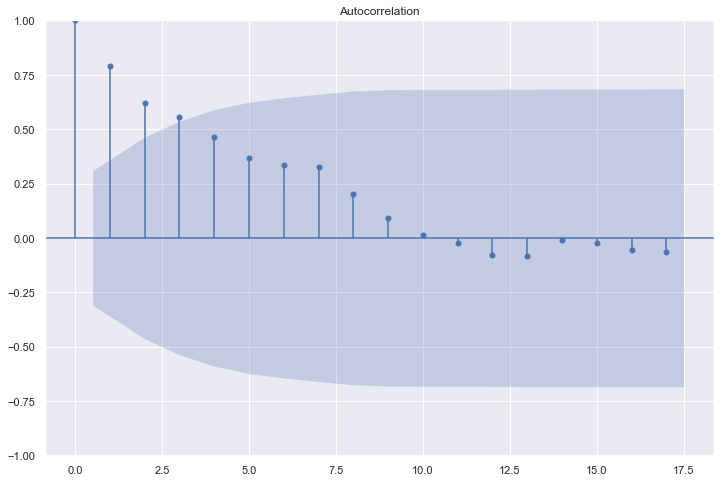

In [80]:
plot_acf(train);

In [31]:
# n = int(0.8*len(mean_per_hh_2012))
n = 400
train = mean_per_hh_2012[:n]
test = mean_per_hh_2012[n:500]

In [19]:
train.index = train.index.to_period('30T')

In [23]:
test.index = test.index.to_period('30T')

                               SARIMAX Results                                
Dep. Variable:                 KWH/hh   No. Observations:                  400
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 978.110
Date:                Sun, 17 Apr 2022   AIC                          -1950.220
Time:                        16:07:24   BIC                          -1938.253
Sample:                    01-01-2012   HQIC                         -1945.480
                         - 01-09-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8459      0.059     14.286      0.000       0.730       0.962
ma.L1         -0.6414      0.082     -7.856      0.000      -0.801      -0.481
sigma2         0.0004   2.85e-05     15.253      0.0

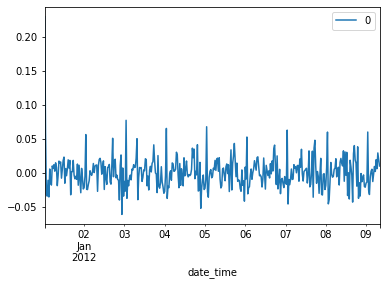

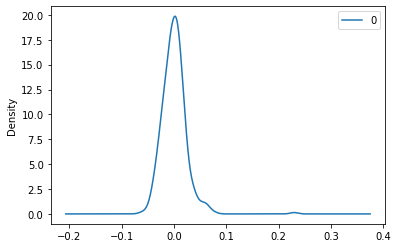

                0
count  400.000000
mean     0.000648
std      0.023823
min     -0.061096
25%     -0.013112
50%     -0.000078
75%      0.011350
max      0.229576


In [22]:
from statsmodels.tsa.arima.model import ARIMA
# fit model
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [30]:
train.index

PeriodIndex(['2012-01-01 00:00', '2012-01-01 00:30', '2012-01-01 01:00',
             '2012-01-01 01:30', '2012-01-01 02:00', '2012-01-01 02:30',
             '2012-01-01 03:00', '2012-01-01 03:30', '2012-01-01 04:00',
             '2012-01-01 04:30',
             ...
             '2012-01-09 03:00', '2012-01-09 03:30', '2012-01-09 04:00',
             '2012-01-09 04:30', '2012-01-09 05:00', '2012-01-09 05:30',
             '2012-01-09 06:00', '2012-01-09 06:30', '2012-01-09 07:00',
             '2012-01-09 07:30'],
            dtype='period[30T]', name='date_time', length=400, freq='30T')

In [12]:
Arima_model = pm.auto_arima(train, start_p=0, start_q=0, max_p=5, max_q=5, 
                            start_P=0, start_Q=0, max_P=5, max_Q=5, m=48, 
                            stepwise=True, seasonal=True, information_criterion='aic', 
                            trace=True, d=1, D=1, error_action='warn', 
                            suppress_warnings=True, random_state = 20, n_fits=10)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[48]             : AIC=-1804.557, Time=0.90 sec
 ARIMA(1,1,0)(1,1,0)[48]             : AIC=-1868.376, Time=5.26 sec
 ARIMA(0,1,1)(0,1,1)[48]             : AIC=inf, Time=31.73 sec
 ARIMA(1,1,0)(0,1,0)[48]             : AIC=-1818.981, Time=0.47 sec
 ARIMA(1,1,0)(2,1,0)[48]             : AIC=-1895.234, Time=27.49 sec
 ARIMA(1,1,0)(3,1,0)[48]             : AIC=-1898.687, Time=97.95 sec
 ARIMA(1,1,0)(4,1,0)[48]             : AIC=-1898.884, Time=147.52 sec
 ARIMA(1,1,0)(5,1,0)[48]             : AIC=inf, Time=507.30 sec
 ARIMA(1,1,0)(4,1,1)[48]             : AIC=-1896.145, Time=224.15 sec
 ARIMA(1,1,0)(3,1,1)[48]             : AIC=inf, Time=139.47 sec
 ARIMA(1,1,0)(5,1,1)[48]             : AIC=-1915.513, Time=691.57 sec
 ARIMA(1,1,0)(5,1,2)[48]             : AIC=-1912.607, Time=731.68 sec
 ARIMA(1,1,0)(4,1,2)[48]             : AIC=inf, Time=361.68 sec
 ARIMA(0,1,0)(5,1,1)[48]             : AIC=-1907.298, Time=824.91 sec
 ARIMA(2,1

In [33]:
prediction = pd.DataFrame(Arima_model.predict(n_periods=len(test)), index=test.index)

In [127]:
prediction_2012 = pd.DataFrame(Arima_model.predict(n_periods=len(mean_per_hh_2012[300:])), index=mean_per_hh_2012[300:].index)

In [35]:
prediction_2013 = pd.DataFrame(Arima_model.predict(n_periods=len(mean_per_hh_2013)), index=mean_per_hh_2013.index)
prediction_2014 = pd.DataFrame(Arima_model.predict(n_periods=len(mean_per_hh_2014)), index=mean_per_hh_2014.index)

In [1]:
train = mean_per_hh_2012[:300]
test = mean_per_hh_2012[300:400]

NameError: name 'mean_per_hh_2012' is not defined

In [138]:
n = int(0.8*len(mean_per_hh_2012_af))

train = mean_per_hh_2012_af['KWH/hh'][:n]
test = mean_per_hh_2012_af['KWH/hh'][n:]

In [ ]:
Arima_model = pm.auto_arima(train, start_p=0, start_q=0, max_p=5, max_q=5, 
                            start_P=0, start_Q=0, max_P=5, max_Q=5, m=48, 
                            stepwise=True, seasonal=True, information_criterion='aic', 
                            trace=True, d=1, D=1, error_action='warn', 
                            suppress_warnings=True, random_state = 20, n_fits=10)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[48]             : AIC=-7125.009, Time=5.42 sec
 ARIMA(1,1,0)(1,1,0)[48]             : AIC=-7276.905, Time=12.03 sec
 ARIMA(0,1,1)(0,1,1)[48]             : AIC=-7353.527, Time=132.07 sec
 ARIMA(0,1,1)(0,1,0)[48]             : AIC=-7137.871, Time=3.35 sec
 ARIMA(0,1,1)(1,1,1)[48]             : AIC=inf, Time=74.59 sec
 ARIMA(0,1,1)(0,1,2)[48]             : AIC=inf, Time=195.71 sec
 ARIMA(0,1,1)(1,1,0)[48]             : AIC=-7269.090, Time=20.50 sec
 ARIMA(0,1,1)(1,1,2)[48]             : AIC=inf, Time=192.30 sec
 ARIMA(0,1,0)(0,1,1)[48]             : AIC=-7316.192, Time=30.26 sec
 ARIMA(1,1,1)(0,1,1)[48]             : AIC=-7362.493, Time=89.68 sec
 ARIMA(1,1,1)(0,1,0)[48]             : AIC=-7139.142, Time=4.30 sec
 ARIMA(1,1,1)(1,1,1)[48]             : AIC=inf, Time=141.33 sec
 ARIMA(1,1,1)(0,1,2)[48]             : AIC=inf, Time=179.19 sec
 ARIMA(1,1,1)(1,1,0)[48]             : AIC=-7276.964, Time=22.66 sec
 ARIMA(1,1,1)(1,1,2

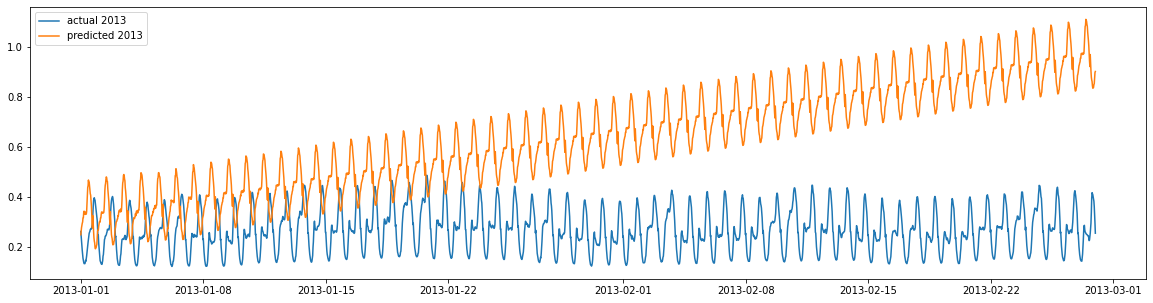

In [36]:
plt.subplots(figsize=(20, 5))
plt.plot(mean_per_hh_2013, label='actual 2013')
plt.plot(prediction_2013, label='predicted 2013')
plt.legend()
plt.show()

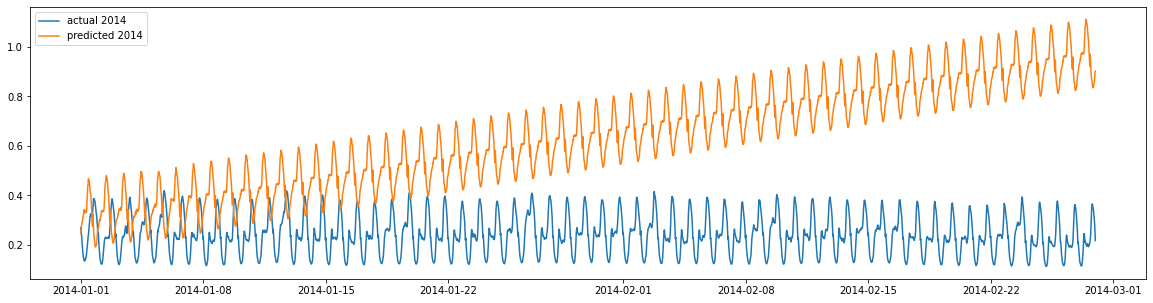

In [37]:
plt.subplots(figsize=(20, 5))
plt.plot(mean_per_hh_2014, label='actual 2014')
plt.plot(prediction_2014, label='predicted 2014')
plt.legend()
plt.show()

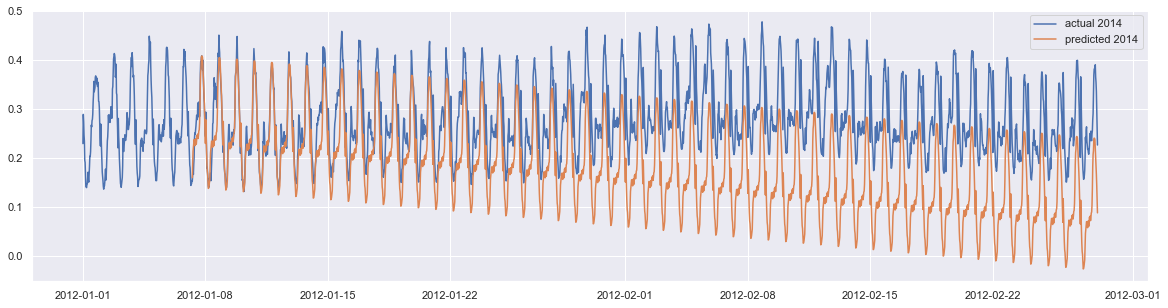

In [128]:
plt.subplots(figsize=(20, 5))
plt.plot(mean_per_hh_2012, label='actual 2014')
plt.plot(prediction_2012, label='predicted 2014')
plt.legend()
plt.show()

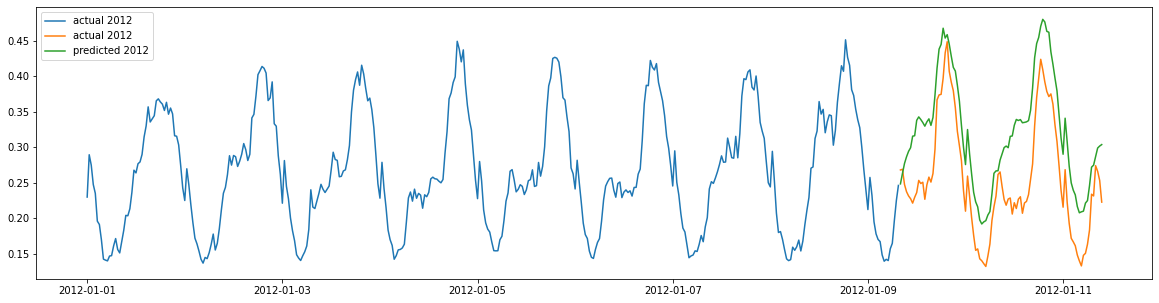

In [38]:
plt.subplots(figsize=(20, 5))
plt.plot(train, label='actual 2012')
plt.plot(test, label='actual 2012')
plt.plot(prediction, label='predicted 2012')
plt.legend()
plt.show()

In [122]:
rmse(test.values, prediction.values)

0.04020352890543285

In [107]:
rmse(daily_2012.values, prediction_2012.values)

4.221567156367359

In [131]:
rmse(mean_per_hh_2014.values, prediction_2014.values)

0.14633707808396057

In [132]:
rmse(mean_per_hh_2013.values, prediction_2013.values)

0.16536184429978415